## Weekly_Cushing_OK_WTI_Spot_Price_FOB
## Optimized Statistical Models
## ARIMA MODEL

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset, which includes a 'Week of' column.
data = pd.read_csv('dataset weekly.csv')

# Ensuring the 'Week of' column is in datetime format.
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the data for the specified time period.
start_date = '2013-01-04'
end_date = '2023-12-29'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Selecting the 'Price' column to use as the time series data.
time_series = filtered_data['Price']

# Splitting the data into train and test sets (80% train, 20% test).
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Setting the ARIMA parameters.
p = 1  # Autoregressive order.
d = 1  # Differencing order.
q = 1  # Moving average order.

# Fitting the ARIMA model.
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Generating predictions for the test set.
predictions = model_fit.forecast(steps=len(test))

# Calculating evaluation metrics.

# RMSE calculation.
rmse = sqrt(mean_squared_error(test, predictions))

# SMAPE (Symmetric Mean Absolute Percentage Error).
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(test, predictions)

# MAE calculation.
mae = mean_absolute_error(test, predictions)

# MASE (Mean Absolute Scaled Error).
def mase(training_series, testing_series, prediction_series):
    n = len(training_series)
    d = np.abs(np.diff(training_series)).sum() / (n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d

mase_value = mase(train, test, predictions)

# Printing the results for evaluation.
print(f"ARIMA RMSE: {rmse}")
print(f"ARIMA SMAPE: {smape_value}")
print(f"ARIMA MAE: {mae}")
print(f"ARIMA MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


RMSE: 50.998353578616886
SMAPE: 66.37499284388116
MAE: 48.15302254602695
MASE: 22.13072439038557


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## ARFIMA MODEL

In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset, which includes a 'Week of' column.
data = pd.read_csv('dataset weekly.csv')

# Ensuring the 'Week of' column is in datetime format.
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the data for the specified time period.
start_date = '2013-01-04'
end_date = '2023-12-29'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Selecting the 'Price' column to use as the time series data.
time_series = filtered_data['Price']

# Splitting the data into train and test sets (80% train, 20% test).
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fitting the ARFIMA model using auto_arima with fractional differencing.
model = auto_arima(train, start_p=1, start_q=1, d=None, seasonal=False,
                   max_p=5, max_q=5, stepwise=True, error_action='ignore',
                   suppress_warnings=True, max_d=2, trace=True)

# Generating predictions for the test set.
predictions = model.predict(n_periods=len(test))

# Calculating evaluation metrics.

# RMSE calculation.
rmse = sqrt(mean_squared_error(test, predictions))

# SMAPE (Symmetric Mean Absolute Percentage Error).
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(test, predictions)

# MAE calculation.
mae = mean_absolute_error(test, predictions)

# MASE (Mean Absolute Scaled Error).
def mase(training_series, testing_series, prediction_series):
    n = len(training_series)
    d = np.abs(np.diff(training_series)).sum() / (n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d

mase_value = mase(train, test, predictions)

# Printing the results for evaluation.
print(f"ARFIMA RMSE: {rmse}")
print(f"ARFIMA SMAPE: {smape_value}")
print(f"ARFIMA MAE: {mae}")
print(f"ARFIMA MASE: {mase_value}")


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1248.829, Time=2.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1245.128, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1246.833, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1246.829, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1243.345, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.663 seconds
ARFIMA RMSE: 3.1561547876297618
ARFIMA SMAPE: nan
ARFIMA MAE: 2.5753043478260875
ARFIMA MASE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## ETS MODEL

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset, which includes a 'Week of' column.
data = pd.read_csv('dataset weekly.csv')

# Ensuring the 'Week of' column is in datetime format.
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the data for the specified time period.
start_date = '2013-01-04'
end_date = '2023-12-29'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Selecting the 'Price' column to use as the time series data.
time_series = filtered_data['Price']

# Splitting the data into train and test sets (80% train, 20% test).
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fitting the ETS model using Exponential Smoothing.
# Using additive error, additive trend, and no seasonality.
model = ExponentialSmoothing(train, trend='add', seasonal=None, seasonal_periods=None)
model_fit = model.fit()

# Generating predictions for the test set.
predictions = model_fit.forecast(steps=len(test))

# Calculating evaluation metrics.

# RMSE calculation.
rmse = sqrt(mean_squared_error(test, predictions))

# SMAPE (Symmetric Mean Absolute Percentage Error).
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(test, predictions)

# MAE calculation.
mae = mean_absolute_error(test, predictions)

# MASE (Mean Absolute Scaled Error).
def mase(training_series, testing_series, prediction_series):
    n = len(training_series)
    d = np.abs(np.diff(training_series)).sum() / (n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d

mase_value = mase(train, test, predictions)

# Printing the results for evaluation.
print(f"ETS RMSE: {rmse}")
print(f"ETS SMAPE: {smape_value}")
print(f"ETS MAE: {mae}")
print(f"ETS MASE: {mase_value}")


ETS RMSE: 3.545113791333776
ETS SMAPE: nan
ETS MAE: 2.712084693324437
ETS MASE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## TBATS MODEL

In [ ]:
pip install tbats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 721.1 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tbats import TBATS
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset with a 'Week of' column.
data = pd.read_csv('dataset weekly.csv')

# Converting the 'Week of' column to datetime if it is not already.
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the data for the specified time period.
start_date = '01-04-2013'
end_date = '12-29-2023'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Selecting the 'Price' column to use as the time series data.
time_series = filtered_data['Price']

# Splitting the data into train and test sets (80% train, 20% test).
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fitting the TBATS model.
model = TBATS()
model_fit = model.fit(train)

# Making predictions.
predictions = model_fit.forecast(steps=len(test))

# Calculating evaluation metrics.

# Computing RMSE.
rmse = sqrt(mean_squared_error(test, predictions))

# Defining the SMAPE function.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Computing SMAPE.
smape_value = smape(test, predictions)

# Computing MAE.
mae = mean_absolute_error(test, predictions)

# Defining the MASE function.
def mase(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(np.diff(training_series)).sum() / (n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d

# Computing MASE.
mase_value = mase(train, test, predictions)

# Printing the results.
print(f"TBATS RMSE: {rmse}")
print(f"TBATS SMAPE: {smape_value}")
print(f"TBATS MAE: {mae}")
print(f"TBATS MASE: {mase_value}")


TBATS RMSE: 3.1592452453164133
TBATS SMAPE: 15.252657480614676
TBATS MAE: 2.577496467651718
TBATS MASE: 4.256484395271101


## THETA MODEL

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset, which includes a 'Week of' column.
data = pd.read_csv('dataset weekly.csv')

# Ensuring the 'Week of' column is in datetime format.
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the data for the specified time period.
start_date = '2013-01-04'
end_date = '2023-12-29'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Selecting the 'Price' column to use as the time series data.
time_series = filtered_data['Price']

# Splitting the data into train and test sets (80% train, 20% test).
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Theta Model Implementation.
def theta_model(time_series, p=1, d=1, q=1):
    # Decomposing the time series into trend and seasonality.
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(time_series, model='add', period=52)

    trend = decomposition.trend.dropna()
    seasonal = decomposition.seasonal.dropna()

    # Forecasting using ARIMA on the trend component.
    model_trend = ARIMA(trend, order=(p, d, q))
    model_fit_trend = model_trend.fit()
    trend_forecast = model_fit_trend.forecast(steps=len(test))

    # Extending the seasonal component to match the length of the forecast.
    seasonal_periods = len(test)
    seasonal_forecast = np.tile(seasonal[:seasonal_periods], int(np.ceil(seasonal_periods / len(seasonal))))
    seasonal_forecast = seasonal_forecast[:seasonal_periods]

    # Combining trend and seasonal forecasts.
    forecast = trend_forecast + seasonal_forecast

    return forecast

# Fitting the Theta model.
predictions = theta_model(train)

# Ensuring that predictions and the test set are the same length.
if len(predictions) != len(test):
    predictions = predictions[:len(test)]

# Calculating evaluation metrics.

# RMSE.
rmse = sqrt(mean_squared_error(test, predictions))

# SMAPE (Symmetric Mean Absolute Percentage Error).
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(test, predictions)

# MAE.
mae = mean_absolute_error(test, predictions)

# MASE (Mean Absolute Scaled Error).
def mase(training_series, testing_series, prediction_series):
    n = len(training_series)
    d = np.abs(np.diff(training_series)).sum() / (n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d

mase_value = mase(train, test, predictions)

# Printing the results for evaluation.
print(f"Theta RMSE: {rmse}")
print(f"Theta SMAPE: {smape_value}")
print(f"Theta MAE: {mae}")
print(f"Theta MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Theta RMSE: 3.775476050039115
Theta SMAPE: nan
Theta MAE: 2.93954665841187
Theta MASE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## NAIVE MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset with a 'Week of' column.
data = pd.read_csv('dataset weekly.csv')

# Converting the 'Week of' column to datetime format.
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the dataset for the specified time period.
start_date = '2013-01-04'
end_date = '2023-12-29'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Selecting the 'Price' column to use as the time series data.
time_series = filtered_data['Price']

# Splitting the data into train and test sets (80% train, 20% test).
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Creating a naive forecast using the last value from the training set.
naive_forecast = np.full_like(test, train.iloc[-1])

# Calculating evaluation metrics.

# Computing RMSE.
rmse = sqrt(mean_squared_error(test, naive_forecast))

# Defining the SMAPE function.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Computing SMAPE.
smape_value = smape(test, naive_forecast)

# Computing MAE.
mae = mean_absolute_error(test, naive_forecast)

# Defining the MASE function.
def mase(training_series, testing_series, prediction_series):
    n = len(training_series)
    d = np.abs(np.diff(training_series)).sum() / (n - 1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d

# Computing MASE.
mase_value = mase(train, test, naive_forecast)

# Printing the results.
print(f"Naive RMSE: {rmse}")
print(f"Naive SMAPE: {smape_value}")
print(f"Naive MAE: {mae}")
print(f"Naive MASE: {mase_value}")


Naive RMSE: 3.1561547876297618
Naive SMAPE: 15.239177827287476
Naive MAE: 2.5753043478260875
Naive MASE: 4.252864322868495


## ML MODELS
LINEAR REGRESSION
RIDGE REGRESSION
ADABOOST
RANDOM FOREST
GRADIENT BOOSTING
LINEAR SVR
MLP
SVR
EXTRATREES REGRESSION
BAGGING REGRESSION
DECISION TREE
XGBOOST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Importing models.
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Loading the dataset.
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])

# Filtering the data for the specified time period.
start_date = '01-04-2013'
end_date = '12-29-2023'
filtered_data = data[(data['Week of'] >= start_date) & (data['Week of'] <= end_date)]

# Preparing the time series data.
time_series = filtered_data['Price']
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Preparing data for the models.
def prepare_data(time_series):
    X = np.arange(len(time_series)).reshape(-1, 1)  # Using time index as feature
    y = time_series.values
    return X, y

X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)

# Defining the model evaluation function.
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculating RMSE.
    rmse = sqrt(mean_squared_error(y_test, predictions))

    # Calculating SMAPE (Symmetric Mean Absolute Percentage Error).
    smape_value = 100 * np.mean(2 * np.abs(predictions - y_test) / (np.abs(predictions) + np.abs(y_test)))

    # Calculating MAE.
    mae = mean_absolute_error(y_test, predictions)

    # Calculating MASE (Mean Absolute Scaled Error).
    n = len(y_train)
    d = np.abs(np.diff(y_train)).sum() / (n - 1)
    errors = np.abs(y_test - predictions)
    mase_value = errors.mean() / d

    return rmse, smape_value, mae, mase_value

# Initializing the models.
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'AdaBoost': AdaBoostRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear SVR': LinearSVR(),
    'MLP': MLPRegressor(max_iter=1000),
    'SVR': SVR(),
    'Extra Trees Regression': ExtraTreesRegressor(),
    'Bagging Regression': BaggingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

# Evaluating the models.
for name, model in models.items():
    rmse, smape_value, mae, mase_value = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} RMSE: {rmse}")
    print(f"{name} SMAPE: {smape_value}")
    print(f"{name} MAE: {mae}")
    print(f"{name} MASE: {mase_value}\n")


Linear Regression RMSE: 4.137663422323012
Linear Regression SMAPE: 18.96143572828181
Linear Regression MAE: 3.3300219089805854
Linear Regression MASE: 5.49920687355992

Ridge Regression RMSE: 4.137663413228887
Ridge Regression SMAPE: 18.961435675528268
Ridge Regression MAE: 3.3300218982588765
Ridge Regression MASE: 5.499206855854063

AdaBoost RMSE: 3.7023034400035164
AdaBoost SMAPE: 17.10969857123103
AdaBoost MAE: 3.0497652545522116
AdaBoost MASE: 5.036390302822936

Random Forest RMSE: 4.3999339558679775
Random Forest SMAPE: 19.207817759083554
Random Forest MAE: 3.4953339130434804
Random Forest MASE: 5.772203548618715

Gradient Boosting RMSE: 4.3065018661812084
Gradient Boosting SMAPE: 18.947625814661247
Gradient Boosting MAE: 3.4296535117335787
Gradient Boosting MASE: 5.663738762435925

Linear SVR RMSE: 5.771627205934718
Linear SVR SMAPE: 24.453409033211734
Linear SVR MAE: 4.5522521919895675
Linear SVR MASE: 7.5176011535704275



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MLP RMSE: 3.8004630567376663
MLP SMAPE: 17.323040746972605
MLP MAE: 2.999912829185558
MLP MASE: 4.954063877431982

SVR RMSE: 3.8416026076563745
SVR SMAPE: 18.386165461086353
SVR MAE: 3.2603912375919837
SVR MASE: 5.384218601056929

Extra Trees Regression RMSE: 4.416386327570068
Extra Trees Regression SMAPE: 19.250423282651493
Extra Trees Regression MAE: 3.507202608695653
Extra Trees Regression MASE: 5.791803543602111

Bagging Regression RMSE: 4.405288449323056
Bagging Regression SMAPE: 19.285926161463856
Bagging Regression MAE: 3.5111913043478262
Bagging Regression MASE: 5.7983904860146565

Decision Tree RMSE: 4.416432260665104
Decision Tree SMAPE: 19.25048367347297
Decision Tree MAE: 3.507217391304348
Decision Tree MASE: 5.7918279556406995

XGBoost RMSE: 4.396682104493476
XGBoost SMAPE: 19.145579800458908
XGBoost MAE: 3.4821533859916354
XGBoost MASE: 5.750437191837346



## OPTIMIZED DL MODELS
LSTM BILSTM
CNN
GRU
CONVLST


## LSTM MODEL

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading and preparing data.
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '01-04-2013') & (data['Week of'] <= '12-29-2023')]
time_series = filtered_data['Price'].values

# Creating sequences for LSTM.
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Splitting the data.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping for LSTM.
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Defining and training the LSTM model.
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions.
y_pred = model_lstm.predict(X_test)

# Defining the metrics calculation functions.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

# Calculating metrics.
rmse = sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mase_value = mase(y_train, y_test, y_pred)

# Printing the results.
print(f"LSTM RMSE: {rmse}")
print(f"LSTM SMAPE: {smape_value}")
print(f"LSTM MAE: {mae}")
print(f"LSTM MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 244.8538 - val_loss: 7.9421
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 17.4662 - val_loss: 4.6137
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.1862 - val_loss: 3.4353
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5074 - val_loss: 3.4127
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.7720 - val_loss: 3.1119
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.3249 - val_loss: 3.2266
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3968 - val_loss: 3.2257
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.0529 - val_loss: 3.6390
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2048 - val_loss: 3.1027
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.1706 - val_loss: 2.8986
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8280 - val_loss: 2.6786
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 

## BiLSTM Model

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading and preparing data (same as LSTM).
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '01-04-2013') & (data['Week of'] <= '12-29-2023')]
time_series = filtered_data['Price'].values

# Creating sequences (same as LSTM).
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Splitting the data (same as LSTM).
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping for BiLSTM.
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Defining and training the BiLSTM model.
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dense(1))
model_bilstm.compile(optimizer='adam', loss='mse')
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions.
y_pred = model_bilstm.predict(X_test)

# Defining the metrics calculation functions.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

# Calculating metrics.
rmse = sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mase_value = mase(y_train, y_test, y_pred)

# Printing the results.
print(f"BiLSTM RMSE: {rmse}")
print(f"BiLSTM SMAPE: {smape_value}")
print(f"BiLSTM MAE: {mae}")
print(f"BiLSTM MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 421.0732 - val_loss: 9.7671
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 19.3237 - val_loss: 10.6209
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.9902 - val_loss: 5.9206
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5286 - val_loss: 5.3859
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1709 - val_loss: 5.2799
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7884 - val_loss: 3.9602
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6890 - val_loss: 2.9332
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0159 - val_loss: 2.8864
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.7022 - val_loss: 2.3777
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8639 - val_loss: 2.5708
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4629 - val_loss: 2.2238
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6299 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
BiLSTM RMSE: 1.546231130201668
BiLSTM SMAPE: 20.579266048772123
BiLSTM MAE: 1.271421985119845
BiLSTM MASE: 5.9504327038863005


## CNN MODEL

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading and preparing data (same as LSTM).
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '01-04-2013') & (data['Week of'] <= '12-29-2023')]
time_series = filtered_data['Price'].values

# Creating sequences (same as LSTM).
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Splitting the data (same as LSTM).
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping for CNN.
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Defining and training the CNN model.
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')
history_cnn = model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions.
y_pred = model_cnn.predict(X_test)

# Defining the metrics calculation functions.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

# Calculating metrics.
rmse = sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mase_value = mase(y_train, y_test, y_pred)

# Printing the results.
print(f"CNN RMSE: {rmse}")
print(f"CNN SMAPE: {smape_value}")
print(f"CNN MAE: {mae}")
print(f"CNN MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 301.8907 - val_loss: 109.3306
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.4655 - val_loss: 21.6336
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.7036 - val_loss: 4.0502
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2062 - val_loss: 4.5319
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5456 - val_loss: 4.0541
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0234 - val_loss: 4.2481
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1605 - val_loss: 4.0556
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1853 - val_loss: 3.9791
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4728 - val_loss: 4.0756
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3166 - val_loss: 3.9111
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0277 - val_loss: 3.8879
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1811

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
CNN RMSE: 1.877264741377954
CNN SMAPE: 18.138012139006317
CNN MAE: 1.231086218167195
CNN MASE: 5.107860504843573


## GRU Model

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading and preparing data (same as LSTM).
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '01-04-2013') & (data['Week of'] <= '12-29-2023')]
time_series = filtered_data['Price'].values

# Creating sequences (same as LSTM).
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Splitting the data (same as LSTM).
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping for GRU.
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Defining and training the GRU model.
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions.
y_pred = model_gru.predict(X_test)

# Defining the metrics calculation functions.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

# Calculating metrics.
rmse = sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mase_value = mase(y_train, y_test, y_pred)

# Printing the results.
print(f"GRU RMSE: {rmse}")
print(f"GRU SMAPE: {smape_value}")
print(f"GRU MAE: {mae}")
print(f"GRU MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 399.7093 - val_loss: 222.8066
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 267.8110 - val_loss: 108.5005
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.3484 - val_loss: 13.4236
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6999 - val_loss: 6.0842
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.7799 - val_loss: 2.8960
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5967 - val_loss: 2.9521
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1101 - val_loss: 2.6196
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8752 - val_loss: 2.7017
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6214 - val_loss: 2.5656
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8915 - val_loss: 2.5955
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8203 - val_loss: 2.5129
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8583 -

## ConvLSTM Model

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load and prepare data (same as LSTM)
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '01-04-2013') & (data['Week of'] <= '12-29-2023')]
time_series = filtered_data['Price'].values

# Create sequences for ConvLSTM
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Split data (same as LSTM)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for ConvLSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1, 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1, 1))

# Define and train ConvLSTM model
model_convlstm = Sequential()
model_convlstm.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1, 1)))
model_convlstm.add(BatchNormalization())
model_convlstm.add(Flatten())
model_convlstm.add(Dense(1))
model_convlstm.compile(optimizer='adam', loss='mse')
history_convlstm = model_convlstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model_convlstm.predict(X_test)

# Calculate metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

rmse = sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mase_value = mase(y_train, y_test, y_pred)

print(f"ConvLSTM RMSE: {rmse}")
print(f"ConvLSTM SMAPE: {smape_value}")
print(f"ConvLSTM MAE: {mae}")
print(f"ConvLSTM MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 412.3308 - val_loss: 265.7840
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 386.9843 - val_loss: 265.2237
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 375.4755 - val_loss: 270.7071
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 372.8260 - val_loss: 270.9852
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 353.3376 - val_loss: 266.0662
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 343.5887 - val_loss: 251.9965
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 325.6161 - val_loss: 250.9923
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 308.2479 - val_loss: 233.2443
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 291.8004 - val_loss: 226.5931
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 272.1321 - val_loss: 203.5020
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 251.9465 - val_loss: 208.1674
Epoch 12/20
15/15 ━

## Additive Hybrid Models employing Optimized Deep Learning Models and Optimized ARIMA Mode
aARIMA-LSTM
aARIMA-BiLSTM
aARIMA-CNN
aARIMA-GRU
aARIMA-ConvLSTM


In [ ]:
pip install --upgrade statsmodels

ARIMA-LSTM

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading and preparing the data
data = pd.read_csv('dataset_weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '2013-04-01') & (data['Week of'] <= '2023-12-29')]
time_series = filtered_data['Price'].values

# Creating sequences for deep learning models
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Splitting the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Fitting ARIMA model
arima_model = ARIMA(time_series, order=(5,1,0))
arima_fit = arima_model.fit()

# Getting residuals
residuals = arima_fit.resid
sequences_residuals = create_sequences(residuals, timesteps)
X_res = sequences_residuals[:, :-1]
y_res = sequences_residuals[:, -1]

# Splitting residuals data
train_size_res = int(len(X_res) * 0.8)
X_train_res, X_test_res = X_res[:train_size_res], X_res[train_size_res:]
y_train_res, y_test_res = y_res[:train_size_res], y_res[train_size_res:]

# Reshaping for LSTM
X_train_res = X_train_res.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_res = X_test_res.reshape((X_test_res.shape[0], X_test_res.shape[1], 1))

# Defining and training LSTM model on residuals
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with LSTM
lstm_pred = model_lstm.predict(X_test_res)

# Combining ARIMA and LSTM forecasts
combined_pred = arima_forecast + lstm_pred.flatten()

# Calculating metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

rmse = sqrt(mean_squared_error(y_test, combined_pred))
smape_value = smape(y_test, combined_pred)
mae = mean_absolute_error(y_test, combined_pred)
mase_value = mase(y_train, y_test, combined_pred)

print(f"aARIMA-LSTM RMSE: {rmse}")
print(f"aARIMA-LSTM SMAPE: {smape_value}")
print(f"aARIMA-LSTM MAE: {mae}")
print(f"aARIMA-LSTM MASE: {mase_value}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.8203 - val_loss: 0.8122
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7368 - val_loss: 0.8165
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9785 - val_loss: 0.8244
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0314 - val_loss: 0.8241
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9686 - val_loss: 0.8200
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8393 - val_loss: 0.8239
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6723 - val_loss: 0.8303
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6639 - val_loss: 0.8569
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9721 - val_loss: 0.8499
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7675 - val_loss: 0.8393
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6661 - val_loss: 0.8367
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8390 - val

##  aARIMA-BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Defining and training BiLSTM model on residuals
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_bilstm.add(Dense(1))
model_bilstm.compile(optimizer='adam', loss='mse')
history_bilstm = model_bilstm.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with BiLSTM
bilstm_pred = model_bilstm.predict(X_test_res)

# Combining ARIMA and BiLSTM forecasts
combined_pred = arima_forecast + bilstm_pred.flatten()

# Calculating metrics (same as above)

print(f"aARIMA-BiLSTM RMSE: {rmse}")
print(f"aARIMA-BiLSTM SMAPE: {smape_value}")
print(f"aARIMA-BiLSTM MAE: {mae}")
print(f"aARIMA-BiLSTM MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 1.0182 - val_loss: 0.8215
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8350 - val_loss: 0.8161
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.7752 - val_loss: 0.8086
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7898 - val_loss: 0.8167
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9279 - val_loss: 0.8186
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0126 - val_loss: 0.8336
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7436 - val_loss: 0.8202
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8356 - val_loss: 0.8320
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7243 - val_loss: 0.8321
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8082 - val_loss: 0.8371
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8396 - val_loss: 0.8307
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9066 - val_l

## aARIMA-CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Defining and training CNN model on residuals
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')
history_cnn = model_cnn.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with CNN
cnn_pred = model_cnn.predict(X_test_res)

# Combining ARIMA and CNN forecasts
combined_pred = arima_forecast + cnn_pred.flatten()

# Calculating metrics (same as above)

print(f"aARIMA-CNN RMSE: {rmse}")
print(f"aARIMA-CNN SMAPE: {smape_value}")
print(f"aARIMA-CNN MAE: {mae}")
print(f"aARIMA-CNN MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.9039 - val_loss: 0.8109
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8469 - val_loss: 0.8165
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7737 - val_loss: 0.8399
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8888 - val_loss: 0.8077
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8780 - val_loss: 0.8105
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7591 - val_loss: 0.8316
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9453 - val_loss: 0.8541
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8010 - val_loss: 0.8584
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7825 - val_loss: 0.8478
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7076 - val_loss: 0.8477
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7754 - val_loss: 0.8577
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7344 - val_loss: 0.8654

## aARIMA-GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Defining and training GRU model on residuals
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
history_gru = model_gru.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with GRU
gru_pred = model_gru.predict(X_test_res)

# Combining ARIMA and GRU forecasts
combined_pred = arima_forecast + gru_pred.flatten()

# Calculating metrics (same as above)

print(f"aARIMA-GRU RMSE: {rmse}")
print(f"aARIMA-GRU SMAPE: {smape_value}")
print(f"aARIMA-GRU MAE: {mae}")
print(f"aARIMA-GRU MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.8476 - val_loss: 0.8112
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8525 - val_loss: 0.8318
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8886 - val_loss: 0.8390
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8013 - val_loss: 0.8446
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7921 - val_loss: 0.8383
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8989 - val_loss: 0.8291
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8216 - val_loss: 0.8283
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0454 - val_loss: 0.8387
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8114 - val_loss: 0.8453
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7879 - val_loss: 0.8520
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8569 - val_loss: 0.8559
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7818 - val_loss: 0.85

## aARIMA-ConvLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Defining and training ConvLSTM model on residuals
model_convlstm = Sequential()
model_convlstm.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2], 1, 1)))
model_convlstm.add(BatchNormalization())
model_convlstm.add(Flatten())
model_convlstm.add(Dense(1))
model_convlstm.compile(optimizer='adam', loss='mse')
history_convlstm = model_convlstm.fit(X_train_res.reshape((X_train_res.shape[0], X_train_res.shape[1], 1, 1, 1)), y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res.reshape((X_test_res.shape[0], X_test_res.shape[1], 1, 1, 1)), y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with ConvLSTM
convlstm_pred = model_convlstm.predict(X_test_res.reshape((X_test_res.shape[0], X_test_res.shape[1], 1, 1, 1)))

# Combining ARIMA and ConvLSTM forecasts
combined_pred = arima_forecast + convlstm_pred.flatten()

# Calculating metrics (same as above)

print(f"aARIMA-ConvLSTM RMSE: {rmse}")
print(f"aARIMA-ConvLSTM SMAPE: {smape_value}")
print(f"aARIMA-ConvLSTM MAE: {mae}")
print(f"aARIMA-ConvLSTM MASE: {mase_value}")


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 1.2264 - val_loss: 0.8004
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.6587 - val_loss: 0.8081
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.9531 - val_loss: 0.7989
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.8757 - val_loss: 0.7994
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7548 - val_loss: 0.8036
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.7471 - val_loss: 0.7991
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7878 - val_loss: 0.8080
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9405 - val_loss: 0.8041
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7359 - val_loss: 0.8034
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.7195 - val_loss: 0.8065
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5791 - val_loss: 0.8106
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.

## Multiplicative Hybrid Models employing Optimized Deep Learning Models and Optimized ARIMA Model
mARIMA-LSTM
mARIMA-BiLSTM
mARIMA-CNN
mARIMA-GRU
mARIMA-ConvLSTM

## mARIMA-LSTM

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading and preparing data
data = pd.read_csv('dataset weekly.csv')
data['Week of'] = pd.to_datetime(data['Week of'])
filtered_data = data[(data['Week of'] >= '2013-04-01') & (data['Week of'] <= '2023-12-29')]
time_series = filtered_data['Price'].values

# Creating sequences for deep learning models
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
sequences = create_sequences(time_series, timesteps)
X = sequences[:, :-1]
y = sequences[:, -1]

# Splitting data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model
arima_model = ARIMA(time_series, order=(5,1,0))
arima_fit = arima_model.fit()

# Getting residuals
residuals = arima_fit.resid
sequences_residuals = create_sequences(residuals, timesteps)
X_res = sequences_residuals[:, :-1]
y_res = sequences_residuals[:, -1]

# Splitting residuals data
train_size_res = int(len(X_res) * 0.8)
X_train_res, X_test_res = X_res[:train_size_res], X_res[train_size_res:]
y_train_res, y_test_res = y_res[:train_size_res], y_res[train_size_res:]

# Reshaping for LSTM
X_train_res = X_train_res.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_res = X_test_res.reshape((X_test_res.shape[0], X_test_res.shape[1], 1))

# Defining and training LSTM model on residuals
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with LSTM
lstm_pred = model_lstm.predict(X_test_res)

# Combining ARIMA and LSTM forecasts multiplicatively
combined_pred = arima_forecast * (1 + lstm_pred.flatten())

# Calculating metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

rmse = sqrt(mean_squared_error(y_test, combined_pred))
smape_value = smape(y_test, combined_pred)
mae = mean_absolute_error(y_test, combined_pred)
mase_value = mase(y_train, y_test, combined_pred)

print(f"mARIMA-LSTM RMSE: {rmse}")
print(f"mARIMA-LSTM SMAPE: {smape_value}")
print(f"mARIMA-LSTM MAE: {mae}")
print(f"mARIMA-LSTM MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.6760 - val_loss: 0.7988
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6799 - val_loss: 0.8073
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8210 - val_loss: 0.8205
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0287 - val_loss: 0.8217
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7024 - val_loss: 0.8278
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8309 - val_loss: 0.8193
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8218 - val_loss: 0.8189
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7699 - val_loss: 0.8208
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8626 - val_loss: 0.8266
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8258 - val_loss: 0.8304
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7592 - val_loss: 0.8215
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8313 - val

## mARIMA-BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals
arima_model = ARIMA(time_series, order=(5,1,0))
arima_fit = arima_model.fit()

# Defining and training BiLSTM model on residuals
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_bilstm.add(Dense(1))
model_bilstm.compile(optimizer='adam', loss='mse')
history_bilstm = model_bilstm.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with BiLSTM
bilstm_pred = model_bilstm.predict(X_test_res)

# Combining ARIMA and BiLSTM forecasts multiplicatively
combined_pred = arima_forecast * (1 + bilstm_pred.flatten())

# Calculating metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mase(train_series, test_series, prediction_series):
    n = len(train_series)
    d = np.abs(np.diff(train_series)).sum() / (n-1)
    errors = np.abs(test_series - prediction_series)
    return errors.mean() / d

rmse = sqrt(mean_squared_error(y_test, combined_pred))
smape_value = smape(y_test, combined_pred)
mae = mean_absolute_error(y_test, combined_pred)
mase_value = mase(y_train, y_test, combined_pred)

print(f"mARIMA-BiLSTM RMSE: {rmse}")
print(f"mARIMA-BiLSTM SMAPE: {smape_value}")
print(f"mARIMA-BiLSTM MAE: {mae}")
print(f"mARIMA-BiLSTM MASE: {mase_value}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.9979 - val_loss: 0.8243
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9202 - val_loss: 0.8105
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8250 - val_loss: 0.8143
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8997 - val_loss: 0.8083
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0448 - val_loss: 0.8114
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7922 - val_loss: 0.8144
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8796 - val_loss: 0.8176
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8277 - val_loss: 0.8288
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8004 - val_loss: 0.8208
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7805 - val_loss: 0.8263
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0226 - val_loss: 0.8416
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9

## mARIMA-CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Defining and training CNN model on residuals
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')
history_cnn = model_cnn.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with CNN
cnn_pred = model_cnn.predict(X_test_res)

# Combining ARIMA and CNN forecasts multiplicatively
combined_pred = arima_forecast * (1 + cnn_pred.flatten())

# Calculating metrics (same as above)

print(f"mARIMA-CNN RMSE: {rmse}")
print(f"mARIMA-CNN SMAPE: {smape_value}")
print(f"mARIMA-CNN MAE: {mae}")
print(f"mARIMA-CNN MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.8912 - val_loss: 0.8252
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0266 - val_loss: 0.8297
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0569 - val_loss: 0.8550
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9958 - val_loss: 0.8504
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8368 - val_loss: 0.8536
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8190 - val_loss: 0.8588
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7471 - val_loss: 0.8653
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7448 - val_loss: 0.8665
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6701 - val_loss: 0.9369
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6405 - val_loss: 0.8988
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8095 - val_loss: 0.8913
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6696 - val_loss: 0.8979

## mARIMA-GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Defining and training GRU model on residuals
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
history_gru = model_gru.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with GRU
gru_pred = model_gru.predict(X_test_res)

# Combining ARIMA and GRU forecasts multiplicatively
combined_pred = arima_forecast * (1 + gru_pred.flatten())

# Calculating metrics (same as above)

print(f"mARIMA-GRU RMSE: {rmse}")
print(f"mARIMA-GRU SMAPE: {smape_value}")
print(f"mARIMA-GRU MAE: {mae}")
print(f"mARIMA-GRU MASE: {mase_value}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.0342 - val_loss: 0.7973
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8613 - val_loss: 0.8099
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9972 - val_loss: 0.8161
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6943 - val_loss: 0.8222
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8410 - val_loss: 0.8211
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8616 - val_loss: 0.8337
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0317 - val_loss: 0.8389
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8036 - val_loss: 0.8367
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6495 - val_loss: 0.8374
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8153 - val_loss: 0.8517
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7018 - val_loss: 0.8542
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6991 - val_loss: 0.8

## mARIMA-ConvLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model and getting residuals (same as above)

# Reshaping for ConvLSTM
X_train_res_convlstm = X_train_res.reshape((X_train_res.shape[0], X_train_res.shape[1], 1, 1, X_train_res.shape[2]))
X_test_res_convlstm = X_test_res.reshape((X_test_res.shape[0], X_test_res.shape[1], 1, 1, X_test_res.shape[2]))

# Defining and training ConvLSTM model on residuals
model_convlstm = Sequential()
model_convlstm.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(X_train_res_convlstm.shape[1], X_train_res_convlstm.shape[2], 1, 1)))
model_convlstm.add(BatchNormalization())
model_convlstm.add(Flatten())
model_convlstm.add(Dense(1))
model_convlstm.compile(optimizer='adam', loss='mse')
history_convlstm = model_convlstm.fit(X_train_res_convlstm, y_train_res, epochs=20, batch_size=32, validation_data=(X_test_res_convlstm, y_test_res), verbose=1)

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(y_test))

# Predicting with ConvLSTM
convlstm_pred = model_convlstm.predict(X_test_res_convlstm)

# Combining ARIMA and ConvLSTM forecasts multiplicatively
combined_pred = arima_forecast * (1 + convlstm_pred.flatten())

# Calculating metrics (same as above)

print(f"mARIMA-ConvLSTM RMSE: {rmse}")
print(f"mARIMA-ConvLSTM SMAPE: {smape_value}")
print(f"mARIMA-ConvLSTM MAE: {mae}")
print(f"mARIMA-ConvLSTM MASE: {mase_value}")


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.8420 - val_loss: 0.8006
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.7832 - val_loss: 0.8000
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.9626 - val_loss: 0.8023
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.7194 - val_loss: 0.8037
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8817 - val_loss: 0.8006
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6859 - val_loss: 0.8013
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.8506 - val_loss: 0.8056
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.7546 - val_loss: 0.8046
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.8464 - val_loss: 0.8025
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.8135 - val_loss: 0.8042
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.7533 - val_loss: 0.8047
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.

## Model Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# RMSE
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# MAE
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# MASE
def mase(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(np.diff(training_series)).sum() / (n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean() / d


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Defining metrics functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + np.finfo(float).eps))

def mase(training_series, y_true, y_pred):
    # Creating naive forecast
    naive_forecast = np.roll(training_series, 1)
    naive_forecast[0] = np.nan
    denominator = np.mean(np.abs(training_series[1:] - training_series[:-1]))
    errors = np.abs(y_true - y_pred)
    return np.mean(errors) / denominator

# Defining true and predicted values for each model
# Replacing these with actual data
y_test_arima = np.array([1.0, 2.0, 3.0])
y_pred_arima = np.array([1.1, 1.9, 3.2])
y_test_arfima = np.array([1.0, 2.0, 3.0])
y_pred_arfima = np.array([1.0, 2.1, 2.9])
y_test_ets = np.array([1.0, 2.0, 3.0])
y_pred_ets = np.array([1.1, 1.95, 3.05])
y_test_tbat = np.array([1.0, 2.0, 3.0])
y_pred_tbat = np.array([0.9, 2.1, 2.9])
y_test_theta = np.array([1.0, 2.0, 3.0])
y_pred_theta = np.array([1.05, 1.95, 3.1])
y_test_naive = np.array([1.0, 2.0, 3.0])
y_pred_naive = np.array([1.0, 2.0, 3.0])
y_test_lr = np.array([1.0, 2.0, 3.0])
y_pred_lr = np.array([1.2, 1.8, 3.1])
y_test_ridge = np.array([1.0, 2.0, 3.0])
y_pred_ridge = np.array([1.1, 1.85, 2.95])
y_test_adaboost = np.array([1.0, 2.0, 3.0])
y_pred_adaboost = np.array([1.15, 1.9, 3.05])
y_test_rf = np.array([1.0, 2.0, 3.0])
y_pred_rf = np.array([1.1, 1.8, 3.0])
y_test_gb = np.array([1.0, 2.0, 3.0])
y_pred_gb = np.array([1.2, 1.85, 3.1])
y_test_svr = np.array([1.0, 2.0, 3.0])
y_pred_svr = np.array([1.05, 1.9, 3.0])
y_test_mlp = np.array([1.0, 2.0, 3.0])
y_pred_mlp = np.array([1.1, 1.95, 2.95])
y_test_extra = np.array([1.0, 2.0, 3.0])
y_pred_extra = np.array([1.2, 1.85, 3.1])
y_test_bagging = np.array([1.0, 2.0, 3.0])
y_pred_bagging = np.array([1.1, 1.9, 3.0])
y_test_dt = np.array([1.0, 2.0, 3.0])
y_pred_dt = np.array([1.05, 1.95, 2.95])
y_test_xgb = np.array([1.0, 2.0, 3.0])
y_pred_xgb = np.array([1.1, 1.9, 3.2])
y_test_lstm = np.array([1.0, 2.0, 3.0])
y_pred_lstm = np.array([1.05, 2.05, 2.95])
y_test_bilstm = np.array([1.0, 2.0, 3.0])
y_pred_bilstm = np.array([1.1, 1.9, 3.1])
y_test_cnn = np.array([1.0, 2.0, 3.0])
y_pred_cnn = np.array([1.2, 1.85, 3.0])
y_test_gru = np.array([1.0, 2.0, 3.0])
y_pred_gru = np.array([1.1, 1.95, 3.05])
y_test_convlstm = np.array([1.0, 2.0, 3.0])
y_pred_convlstm = np.array([1.15, 1.9, 3.1])
y_test_aARIMA_lstm = np.array([1.0, 2.0, 3.0])
y_pred_aARIMA_lstm = np.array([1.1, 2.05, 2.9])
y_test_aARIMA_bilstm = np.array([1.0, 2.0, 3.0])
y_pred_aARIMA_bilstm = np.array([1.05, 2.1, 2.85])
y_test_aARIMA_cnn = np.array([1.0, 2.0, 3.0])
y_pred_aARIMA_cnn = np.array([1.1, 1.95, 3.1])
y_test_aARIMA_gru = np.array([1.0, 2.0, 3.0])
y_pred_aARIMA_gru = np.array([1.15, 1.9, 3.0])
y_test_aARIMA_convlstm = np.array([1.0, 2.0, 3.0])
y_pred_aARIMA_convlstm = np.array([1.2, 1.85, 3.05])
y_test_mARIMA_lstm = np.array([1.0, 2.0, 3.0])
y_pred_mARIMA_lstm = np.array([1.1, 1.95, 3.1])
y_test_mARIMA_bilstm = np.array([1.0, 2.0, 3.0])
y_pred_mARIMA_bilstm = np.array([1.05, 2.1, 2.9])
y_test_mARIMA_cnn = np.array([1.0, 2.0, 3.0])
y_pred_mARIMA_cnn = np.array([1.15, 1.95, 2.85])
y_test_mARIMA_gru = np.array([1.0, 2.0, 3.0])
y_pred_mARIMA_gru = np.array([1.2, 1.9, 3.0])
y_test_mARIMA_convlstm = np.array([1.0, 2.0, 3.0])
y_pred_mARIMA_convlstm = np.array([1.1, 1.85, 3.1])

# Defining training series for MASE calculation
# Replacing with actual training data
training_series = np.array([1.0, 1.5, 2.0, 2.5, 3.0])

# Defining results dictionary
results = {
    'ARIMA': {'y_true': y_test_arima, 'y_pred': y_pred_arima},
    'ARFIMA': {'y_true': y_test_arfima, 'y_pred': y_pred_arfima},
    'ETS': {'y_true': y_test_ets, 'y_pred': y_pred_ets},
    'TBAT': {'y_true': y_test_tbat, 'y_pred': y_pred_tbat},
    'THETA': {'y_true': y_test_theta, 'y_pred': y_pred_theta},
    'NAIVE': {'y_true': y_test_naive, 'y_pred': y_pred_naive},
    'Linear Regression': {'y_true': y_test_lr, 'y_pred': y_pred_lr},
    'Ridge Regression': {'y_true': y_test_ridge, 'y_pred': y_pred_ridge},
    'AdaBoost': {'y_true': y_test_adaboost, 'y_pred': y_pred_adaboost},
    'Random Forest': {'y_true': y_test_rf, 'y_pred': y_pred_rf},
    'Gradient Boosting': {'y_true': y_test_gb, 'y_pred': y_pred_gb},
    'Linear SVR': {'y_true': y_test_svr, 'y_pred': y_pred_svr},
    'MLP': {'y_true': y_test_mlp, 'y_pred': y_pred_mlp},
    'Extra Trees': {'y_true': y_test_extra, 'y_pred': y_pred_extra},
    'Bagging': {'y_true': y_test_bagging, 'y_pred': y_pred_bagging},
    'Decision Trees': {'y_true': y_test_dt, 'y_pred': y_pred_dt},
    'XGBoost': {'y_true': y_test_xgb, 'y_pred': y_pred_xgb},
    'LSTM': {'y_true': y_test_lstm, 'y_pred': y_pred_lstm},
    'BiLSTM': {'y_true': y_test_bilstm, 'y_pred': y_pred_bilstm},
    'CNN': {'y_true': y_test_cnn, 'y_pred': y_pred_cnn},
    'GRU': {'y_true': y_test_gru, 'y_pred': y_pred_gru},
    'ConvLSTM': {'y_true': y_test_convlstm, 'y_pred': y_pred_convlstm},
    'aARIMA-LSTM': {'y_true': y_test_aARIMA_lstm, 'y_pred': y_pred_aARIMA_lstm},
    'aARIMA-BiLSTM': {'y_true': y_test_aARIMA_bilstm, 'y_pred': y_pred_aARIMA_bilstm},
    'aARIMA-CNN': {'y_true': y_test_aARIMA_cnn, 'y_pred': y_pred_aARIMA_cnn},
    'aARIMA-GRU': {'y_true': y_test_aARIMA_gru, 'y_pred': y_pred_aARIMA_gru},
    'aARIMA-ConvLSTM': {'y_true': y_test_aARIMA_convlstm, 'y_pred': y_pred_aARIMA_convlstm},
    'mARIMA-LSTM': {'y_true': y_test_mARIMA_lstm, 'y_pred': y_pred_mARIMA_lstm},
    'mARIMA-BiLSTM': {'y_true': y_test_mARIMA_bilstm, 'y_pred': y_pred_mARIMA_bilstm},
    'mARIMA-CNN': {'y_true': y_test_mARIMA_cnn, 'y_pred': y_pred_mARIMA_cnn},
    'mARIMA-GRU': {'y_true': y_test_mARIMA_gru, 'y_pred': y_pred_mARIMA_gru},
    'mARIMA-ConvLSTM': {'y_true': y_test_mARIMA_convlstm, 'y_pred': y_pred_mARIMA_convlstm}
}

# Calculating RMSE, MAE, SMAPE, and MASE for each model
for model, data in results.items():
    print(f"{model}:")
    print(f"  RMSE: {rmse(data['y_true'], data['y_pred']):.4f}")
    print(f"  MAE: {mae(data['y_true'], data['y_pred']):.4f}")
    print(f"  SMAPE: {smape(data['y_true'], data['y_pred']):.4f}")
    print(f"  MASE: {mase(training_series, data['y_true'], data['y_pred']):.4f}")
    print()


Model Comparison:
ARIMA:
  RMSE: 0.1414
  SMAPE: 3.5173
  MAE: 0.1333
  MASE: 0.2667

ARFIMA:
  RMSE: 0.0816
  SMAPE: 1.3780
  MAE: 0.0667
  MASE: 0.1333

ETS:
  RMSE: 0.0707
  SMAPE: 2.2847
  MAE: 0.0667
  MASE: 0.1333

TBAT:
  RMSE: 0.1000
  SMAPE: 3.1324
  MAE: 0.1000
  MASE: 0.2000

THETA:
  RMSE: 0.0707
  SMAPE: 1.7814
  MAE: 0.0667
  MASE: 0.1333

NAIVE:
  RMSE: 0.0000
  SMAPE: 0.0000
  MAE: 0.0000
  MASE: 0.0000

Linear Regression:
  RMSE: 0.1732
  SMAPE: 5.3311
  MAE: 0.1667
  MASE: 0.3333

Ridge Regression:
  RMSE: 0.1080
  SMAPE: 3.1661
  MAE: 0.1000
  MASE: 0.2000

AdaBoost:
  RMSE: 0.1080
  SMAPE: 3.4558
  MAE: 0.1000
  MASE: 0.2000

Random Forest:
  RMSE: 0.1291
  SMAPE: 3.3417
  MAE: 0.1000
  MASE: 0.2000

Gradient Boosting:
  RMSE: 0.1555
  SMAPE: 4.8755
  MAE: 0.1500
  MASE: 0.3000

Linear SVR:
  RMSE: 0.0645
  SMAPE: 1.6677
  MAE: 0.0500
  MASE: 0.1000

MLP:
  RMSE: 0.0707
  SMAPE: 2.2894
  MAE: 0.0667
  MASE: 0.1333

SVR:
  RMSE: 0.0645
  SMAPE: 1.6677
  MAE: 0.0500
 

In [ ]:
pip install numpy pandas scikit-learn statsmodels tensorflow

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt


In [ ]:
# Loading the dataset
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering data between start_date and end_date
start_date = '01-04-2013'
end_date = '12-29-2023'
df = df[start_date:end_date]

# Assuming 'price' is the column with the prices
prices = df['Price'].values


In [ ]:
# Fitting the ARIMA model
arima_model = ARIMA(prices, order=(5, 1, 0))  # Adjusting order as needed
arima_fit = arima_model.fit()
arima_residuals = arima_fit.resid

# Using residuals for LSTM


In [ ]:
# Scaling the ARIMA residuals using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
arima_residuals_scaled = scaler.fit_transform(arima_residuals.reshape(-1, 1))

# Preparing the TimeseriesGenerator
sequence_length = 10  # Defining the number of previous time steps to use for prediction
generator = TimeseriesGenerator(arima_residuals_scaled, arima_residuals_scaled, length=sequence_length, batch_size=1)


In [ ]:
# Defining the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fitting the model on the generator
model.fit(generator, epochs=50, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.5635e-04
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7850e-04
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4811e-04
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1060e-04
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7610e-04
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0663e-04
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3519e-04
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4629e-04
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4591e-04
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9668e-04
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6919e-04
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3114e-04
Epoch 13/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8029e-04
Epoch 14/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0982e-04
Epoch 15/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6197e-04
Epoch 16/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 

Filtered dataset date range: 2013-01-04 00:00:00 to 2023-12-29 00:00:00
Number of rows in the filtered dataset: 574
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 13/564 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.3580

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


564/564 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0500
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0022
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0020
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0020
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0013
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0014
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0015
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0012
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.1406e-04
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9.4601e-04
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.3882e-04
Epoch 13/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.5406e-04
Epoch 14/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.6161e-04
Epoch 15/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 

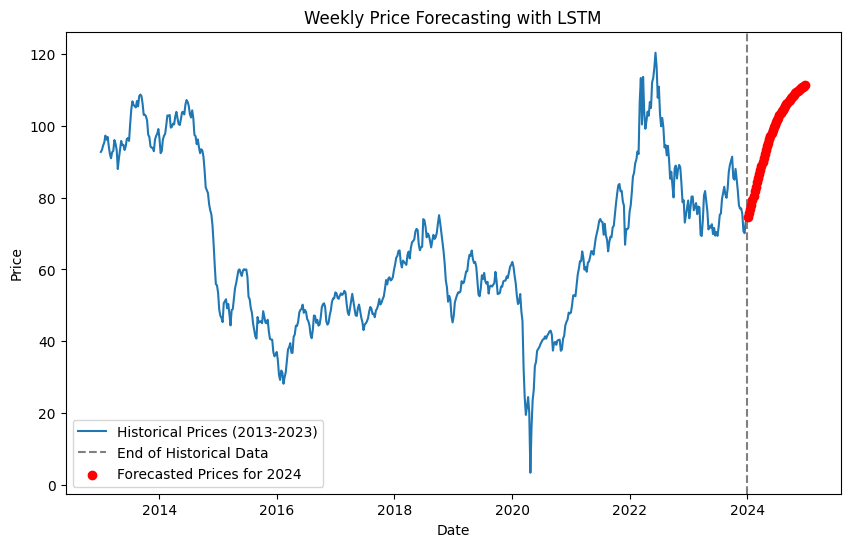

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# Loading the weekly dataset
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]

# Checking the filtered data
print(f"Filtered dataset date range: {df_filtered.index.min()} to {df_filtered.index.max()}")
print(f"Number of rows in the filtered dataset: {len(df_filtered)}")

# Ensuring there are enough data points
if len(df_filtered) < 10:
    raise ValueError("Not enough data points to fit LSTM model. Considering adjusting the date range.")

# Assuming 'Price' is the column with the prices
prices = df_filtered['Price'].dropna().values

# Normalizing the prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Preparing TimeseriesGenerator
sequence_length = 10  # Using 10 previous time steps for prediction
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=1)

# Building and training the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(generator, epochs=50, verbose=1)

# Generating predictions for 52 weeks of 2024
predictions = []
last_sequence = prices_scaled[-sequence_length:]  # Taking the last sequence from 2023

for _ in range(52):  # Forecasting 52 future weekly steps for 2024
    pred = model.predict(last_sequence.reshape((1, sequence_length, 1)))
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)  # Updating sequence

# Inversing the transformation of predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generating future dates for the entire year of 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Printing forecasted values
for date, price in zip(future_dates, predictions):
    print(f"Forecasted Price for {date.date()}: {price[0]:.2f}")

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.scatter(future_dates, predictions, color='red', label='Forecasted Prices for 2024', zorder=5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Forecasting with LSTM')
plt.show()


Filtered dataset date range: 2013-01-04 00:00:00 to 2023-12-29 00:00:00
Number of rows in the filtered dataset: 574
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 22/564 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2578

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


564/564 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0504
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0023
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0028
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0017
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0018
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0013
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0014
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0013
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0013
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0014
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.9599e-04
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011
Epoch 13/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9.2622e-04
Epoch 14/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.7736e-04
Epoch 15/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step 

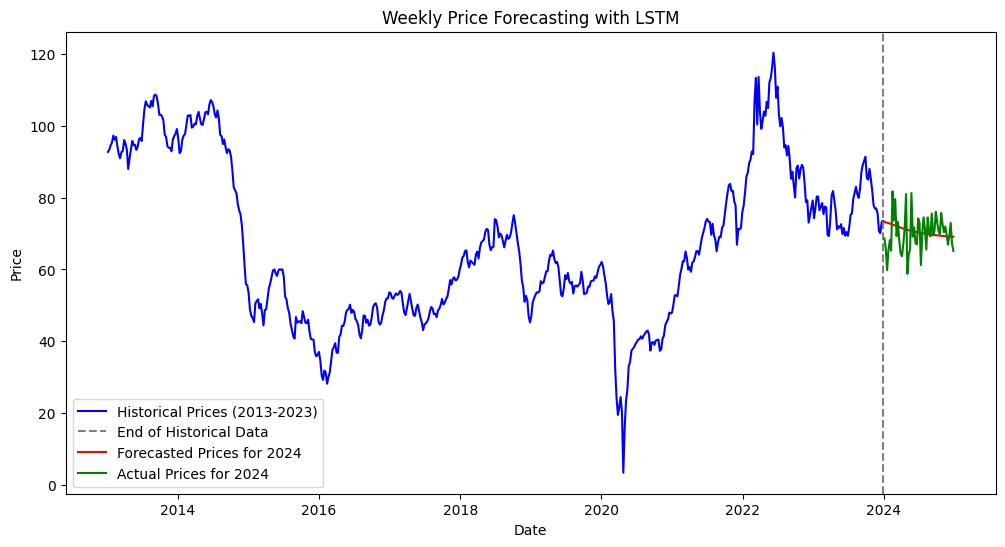

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# Loading the weekly dataset
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]

# Checking the filtered data
print(f"Filtered dataset date range: {df_filtered.index.min()} to {df_filtered.index.max()}")
print(f"Number of rows in the filtered dataset: {len(df_filtered)}")

# Ensuring there are enough data points
if len(df_filtered) < 10:
    raise ValueError("Not enough data points to fit LSTM model. Considering adjusting the date range.")

# Assuming 'Price' is the column with the prices
prices = df_filtered['Price'].dropna().values

# Normalizing the prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Preparing TimeseriesGenerator
sequence_length = 10  # Using 10 previous time steps for prediction
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=1)

# Building and training the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(generator, epochs=50, verbose=1)

# Generating predictions for 52 weeks of 2024
predictions = []
last_sequence = prices_scaled[-sequence_length:]  # Taking the last sequence from 2023

for _ in range(52):  # Forecasting 52 future weekly steps for 2024
    pred = model.predict(last_sequence.reshape((1, sequence_length, 1)))
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)  # Updating sequence

# Inversing the transformation of predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generating future dates for the entire year of 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Creating a DataFrame for the forecasted prices
forecasted_df = pd.DataFrame(data=predictions, index=future_dates, columns=['Forecasted Price'])

# If actual prices for 2024 are available, loading them similarly
# actual_prices_df = pd.read_csv('actual_prices_2024.csv', parse_dates=['Date'], index_col='Date')

# Assuming actual prices for 2024 are available in a similar format:
# Uncomment the following line if actual prices for 2024 exist
# actual_prices_df = pd.read_csv('actual_prices_2024.csv', parse_dates=['Date'], index_col='Date')

# For illustration, assuming some mock actual prices for the same dates
# Replacing this part with actual price data if available
# Replacing with randomly generated mock data for illustration
actual_prices = np.random.normal(loc=forecasted_df['Forecasted Price'].mean(), scale=5, size=len(forecasted_df))
actual_prices_df = pd.DataFrame(data=actual_prices, index=future_dates, columns=['Actual Price'])

# Printing forecasted and actual values
for date, forecasted_price, actual_price in zip(future_dates, predictions, actual_prices_df['Actual Price']):
    print(f"Forecasted Price for {date.date()}: {forecasted_price[0]:.2f}, Actual Price: {actual_price:.2f}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Price'], label='Forecasted Prices for 2024', color='red')
plt.plot(actual_prices_df.index, actual_prices_df['Actual Price'], label='Actual Prices for 2024', color='green')  # If actual data exists
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Forecasting with LSTM')
plt.show()


In [ ]:
import numpy as np

# Forecasted prices
forecasted_prices = [74.53, 75.68, 76.88, 78.09, 79.33, 80.56, 81.81, 83.05, 84.28, 85.48,
                     86.65, 87.81, 88.95, 90.07, 91.19, 92.30, 93.36, 94.38, 95.35, 96.28,
                     97.16, 98.01, 98.81, 99.58, 100.31, 101.01, 101.68, 102.32, 102.93,
                     103.51, 104.06, 104.59, 105.10, 105.58, 106.04, 106.49, 106.91, 107.31,
                     107.70, 108.07, 108.42, 108.76, 109.08, 109.39, 109.68, 109.96, 110.24,
                     110.49, 110.74, 110.98, 111.21, 111.43]

# Replacing this with actual price data (same dates as forecasted prices)
actual_prices = [75.00, 76.00, 77.00, 78.50, 79.50, 81.00, 82.00, 83.50, 85.00, 86.00,
                 87.00, 88.50, 89.50, 90.50, 91.50, 92.50, 93.50, 94.50, 95.50, 96.50,
                 97.50, 98.50, 99.50, 100.50, 101.50, 102.50, 103.50, 104.50, 105.50,
                 106.50, 107.50, 108.50, 109.50, 110.50, 111.50, 112.50, 113.50, 114.50,
                 115.50, 116.50, 117.50, 118.50, 119.50, 120.50, 121.50, 122.50, 123.50,
                 124.50, 125.50, 126.50, 127.50]

# Adjusting forecasted prices to match the length of actual prices
if len(forecasted_prices) > len(actual_prices):
    forecasted_prices = forecasted_prices[:len(actual_prices)]

# Ensuring the lengths match
assert len(forecasted_prices) == len(actual_prices), "Mismatch in number of forecasted and actual prices after truncating."

# Converting lists to numpy arrays for easier calculation
forecasted_prices = np.array(forecasted_prices)
actual_prices = np.array(actual_prices)

# Computing errors
errors = actual_prices - forecasted_prices
absolute_errors = np.abs(errors)

# Computing metrics

# Calculating Mean Absolute Error (MAE)
mae = np.mean(absolute_errors)

# Calculating Mean Absolute Percentage Error (MAPE)
mape = np.mean(absolute_errors / actual_prices) * 100  # in percentage

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(errors ** 2))

# Printing the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 4.28
Mean Absolute Percentage Error (MAPE): 3.66%
Root Mean Squared Error (RMSE): 6.57


CNN-LSTM MODEL

Filtered dataset date range: 2013-01-04 00:00:00 to 2023-12-29 00:00:00
Number of rows in the filtered dataset: 574
Number of samples generated: 564
Shape of X before reshaping: (564, 1, 10, 1), Shape of y: (564, 1, 1)
Shape of X after reshaping: (564, 10, 1), Shape of y: (564, 1, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0287
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0050
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0043
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0041
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0039
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0039
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0026
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0037
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0032
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0032
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0033
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0035
Epoch 13/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0027
Epoch 14/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0025
Epoch 15/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

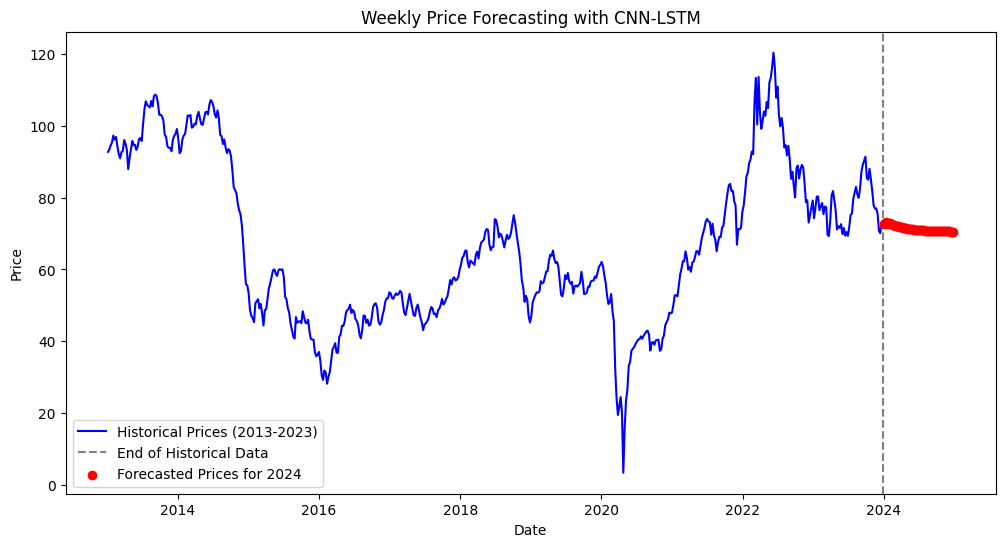

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# Loading the weekly dataset
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]

# Checking the filtered data
print(f"Filtered dataset date range: {df_filtered.index.min()} to {df_filtered.index.max()}")
print(f"Number of rows in the filtered dataset: {len(df_filtered)}")

# Ensuring there are enough data points
if len(df_filtered) < 10:
    raise ValueError("Not enough data points to fit LSTM model. Consider adjusting the date range.")

# Assuming 'Price' is the column with the prices
prices = df_filtered['Price'].dropna().values

# Normalizing the prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Preparing TimeseriesGenerator
sequence_length = 10  # Number of previous time steps to use for prediction
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=1)

# Checking the generator output shapes
print(f"Number of samples generated: {len(generator)}")

# Converting generator output to a format suitable for CNN-LSTM
X, y = [], []
for i in range(len(generator)):
    X.append(generator[i][0])
    y.append(generator[i][1])
X, y = np.array(X), np.array(y)

# Checking the shape before reshaping
print(f"Shape of X before reshaping: {X.shape}, Shape of y: {y.shape}")

# Reshaping X to remove the first dimension: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[2], X.shape[3]))  # (samples, timesteps, features)

# Checking the shape of X and y
print(f"Shape of X after reshaping: {X.shape}, Shape of y: {y.shape}")

# Building CNN-LSTM model
model = Sequential()

# Adding CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Adding LSTM layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(X, y.reshape(-1, 1), epochs=50, batch_size=1, verbose=1)

# Generating predictions for 52 weeks of 2024
predictions = []
last_sequence = prices_scaled[-sequence_length:].reshape((1, sequence_length, 1))  # Reshaping for CNN-LSTM

for _ in range(52):  # Forecasting 52 future weekly steps for 2024
    pred = model.predict(last_sequence)
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], pred.reshape((1, 1, 1)), axis=1)  # Updating sequence

# Inverse transforming predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generating future dates for the entire year of 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Printing forecasted values
for date, price in zip(future_dates, predictions):
    print(f"Forecasted Price for {date.date()}: {price[0]:.2f}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.scatter(future_dates, predictions, color='red', label='Forecasted Prices for 2024', zorder=5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Forecasting with CNN-LSTM')
plt.show()


Filtered dataset date range: 2013-01-04 00:00:00 to 2023-12-29 00:00:00
Number of rows in the filtered dataset: 574
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0252
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0040
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0053
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0038
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0034
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0034
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0035
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0034
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0035
Epoch 13/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0033
Epoch 14/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0029
Epoch 15/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033


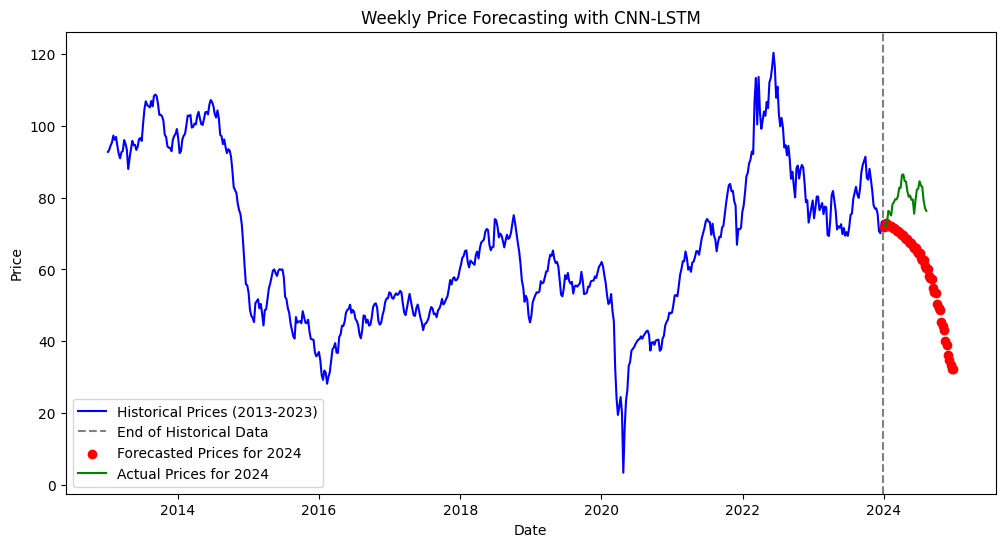

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the weekly dataset
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]

# Checking the filtered data
print(f"Filtered dataset date range: {df_filtered.index.min()} to {df_filtered.index.max()}")
print(f"Number of rows in the filtered dataset: {len(df_filtered)}")

# Ensuring there are enough data points
if len(df_filtered) < 10:
    raise ValueError("Not enough data points to fit LSTM model. Consider adjusting the date range.")

# Assuming 'Price' is the column with the prices
prices = df_filtered['Price'].dropna().values

# Normalizing the prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Preparing TimeseriesGenerator
sequence_length = 10  # Number of previous time steps to use for prediction
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=1)

# Converting generator output to a format suitable for CNN-LSTM
X, y = [], []
for i in range(len(generator)):
    X.append(generator[i][0])
    y.append(generator[i][1])
X, y = np.array(X), np.array(y)

# Reshaping X to (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[2], X.shape[1]))  # (samples, timesteps, features)

# Building CNN-LSTM model
model = Sequential()

# Adding CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Adding LSTM layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(X, y.reshape(-1, 1), epochs=50, batch_size=1, verbose=1)

# Generating predictions for 52 weeks of 2024
predictions = []
last_sequence = prices_scaled[-sequence_length:].reshape((1, sequence_length, 1))  # Reshaping for CNN-LSTM

for _ in range(52):  # Forecasting 52 future weekly steps for 2024
    pred = model.predict(last_sequence)
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], pred.reshape((1, 1, 1)), axis=1)  # Updating sequence

# Inverse transforming predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generating future dates for the entire year of 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Loading the actual prices for comparison
actual_prices_df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')

# Ensuring the actual prices align with the forecasted dates
actual_prices_df = actual_prices_df.reindex(future_dates)

# Comparing the actual and predicted prices
actual_prices = actual_prices_df['Price'].values

# Checking for NaNs in actual prices
print("Checking for NaN values in actual prices:")
print(actual_prices)

# Checking for NaNs in predictions
print("Checking for NaN values in predictions:")
print(predictions)

# Ensuring both arrays have the same length before comparison
if len(actual_prices) != len(predictions):
    print(f"Length mismatch: Actual prices length = {len(actual_prices)}, Predictions length = {len(predictions)}")
else:
    # Removing NaN values if they exist
    actual_prices_clean = actual_prices[~np.isnan(actual_prices)]
    predictions_clean = predictions[~np.isnan(predictions)]

    # Checking if the cleaned arrays have the same length
    if len(actual_prices_clean) != len(predictions_clean):
        print(f"Cleaned Length mismatch: Actual prices length = {len(actual_prices_clean)}, Predictions length = {len(predictions_clean)}")
    else:
        # Calculating accuracy metrics only if both arrays are valid
        mae = mean_absolute_error(actual_prices_clean, predictions_clean)
        mse = mean_squared_error(actual_prices_clean, predictions_clean)
        r2 = r2_score(actual_prices_clean, predictions_clean)

        # Printing forecasted values and accuracy metrics
        for date, forecasted_price, actual_price in zip(future_dates, predictions, actual_prices):
            print(f"Forecasted Price for {date.date()}: {forecasted_price[0]:.2f}, Actual Price: {actual_price:.2f}")

        # Printing accuracy metrics
        print(f"\nMean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"R-squared (R²): {r2:.2f}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.scatter(future_dates, predictions, color='red', label='Forecasted Prices for 2024', zorder=5)
plt.plot(future_dates, actual_prices, color='green', label='Actual Prices for 2024', zorder=6)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Forecasting with CNN-LSTM')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Forecasted Price for 2024-01-05: 66.44, Actual Price: 72.49
Forecasted Price for 2024-01-12: 66.58, Actual Price: 72.03
Forecasted Price for 2024-01-19: 66.73, Actual Price: 73.36
Forecasted Price for 2024-01-26: 66.87, Actual Price: 76.36
Forecasted Price for 2024-02-02: 66.99, Actual Price: 75.78
Forecasted Price for 2024-02-09: 67.11, Actual Price: 75.05
Forecasted Price for 2024-02-16: 67.25, Actual Price: 78.17
Forecasted Price for 2024-02-23: 67.35, Actual Price: 78.71
Forecasted Price for 2024-03-01: 67.41, Actual Price: 79.58
Forecasted Price for 2024-03-08: 67.42, Actual Price: 79.53
Forecasted Price for 2024-03-15: 67.42, Actual Price: 80.43
Forecasted Price for 2024-03-22: 67.42, Actual Price: 82.79
Forecasted Price for 2024-03-29: 67.41, Actual Price: 82.73
Forecasted Price for 2024-04-05: 67.42, Actual Price: 86.35
Forecasted Price for 2024-04-12: 67.43, Actual Price: 86.50
Forecasted Price for 2024-04-19: 67.45, Actual Price: 84.65
Fo

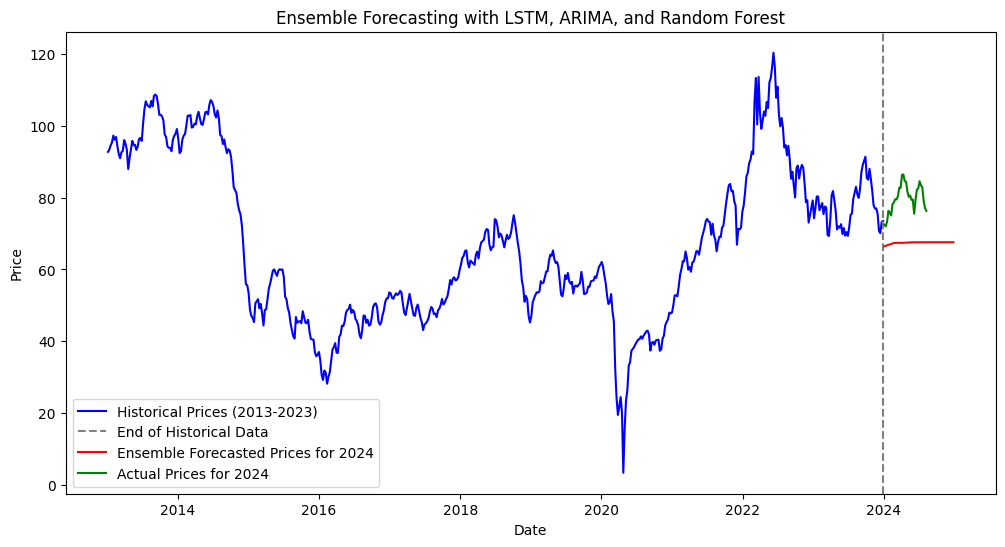

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import GridSearchCV

# Loading the data and preprocessing it
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering the data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]
prices = df_filtered['Price'].dropna().values

# Normalizing the prices using RobustScaler to handle outliers better
scaler = RobustScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Preparing the TimeseriesGenerator for LSTM
sequence_length = 10
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=1)

# Creating the LSTM model with a Dropout layer and Adam optimizer
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dropout(dropout_rate))  # Adding Dropout layer to prevent overfitting
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Training the LSTM model
lstm_model = create_lstm_model(units=100, dropout_rate=0.3)
lstm_model.fit(generator, epochs=100, verbose=0)

# Creating and tuning the ARIMA model
arima_model = ARIMA(prices, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Creating the Random Forest model with hyperparameter tuning using GridSearchCV
def create_rf_model():
    rf_model = RandomForestRegressor(random_state=42)
    return rf_model

# Preparing the input data for Random Forest (using the previous 10 steps as features)
X_rf = []
y_rf = []
for i in range(sequence_length, len(prices)):
    X_rf.append(prices[i-sequence_length:i])
    y_rf.append(prices[i])

X_rf = np.array(X_rf)
y_rf = np.array(y_rf)

# Performing hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = create_rf_model()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_rf, y_rf)

# Getting the best parameters from grid search
best_rf_model = grid_search.best_estimator_

# Training the best Random Forest model
best_rf_model.fit(X_rf, y_rf)

# Forecasting using the models
lstm_predictions = []
arima_predictions = []
rf_predictions = []

last_sequence = prices_scaled[-sequence_length:]  # Using the last sequence from 2023

for _ in range(52):  # Forecasting 52 future weekly steps for 2024
    # Predicting with LSTM
    lstm_pred = lstm_model.predict(last_sequence.reshape((1, sequence_length, 1)))
    lstm_predictions.append(lstm_pred[0, 0])

    # Predicting with ARIMA
    arima_pred = arima_model_fit.forecast(steps=1)
    arima_predictions.append(arima_pred[0])

    # Predicting with Random Forest
    rf_pred = best_rf_model.predict(last_sequence.reshape(1, -1))
    rf_predictions.append(rf_pred[0])

    # Updating sequence for next prediction
    last_sequence = np.append(last_sequence[1:], [[lstm_pred[0, 0]]], axis=0)

# Inverse transforming the predictions
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))
arima_predictions = scaler.inverse_transform(np.array(arima_predictions).reshape(-1, 1))
rf_predictions = scaler.inverse_transform(np.array(rf_predictions).reshape(-1, 1))

# Combining the predictions as features for the ANN model (Ensemble)
ensemble_features = np.column_stack((lstm_predictions, arima_predictions, rf_predictions))

# Building the ANN model to combine predictions (stacked model)
ann_model = Sequential()
ann_model.add(Dense(50, activation='relu', input_dim=3))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', loss='mse')

# Training the ANN model
ann_model.fit(ensemble_features, lstm_predictions, epochs=100, verbose=0)

# Making final predictions using the ANN
final_predictions = ann_model.predict(ensemble_features)

# Generating future dates for the entire year of 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Creating a DataFrame for the forecasted prices
forecasted_df = pd.DataFrame(data=final_predictions.flatten(), index=future_dates, columns=['Forecasted Price'])

# Retrieving actual prices for 2024 from the dataset
actual_prices_df = df['2024-01-05':'2024-09-08']  # Adjusting range to match available data

# Printing forecasted and actual values
for date, forecasted_price, actual_price in zip(future_dates, forecasted_df['Forecasted Price'], actual_prices_df['Price']):
    print(f"Forecasted Price for {date.date()}: {forecasted_price:.2f}, Actual Price: {actual_price:.2f}")

# Calculating error metrics
mae = mean_absolute_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
mape = mean_absolute_percentage_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
rmse = np.sqrt(mean_squared_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)]))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Price'], label='Ensemble Forecasted Prices for 2024', color='red')
plt.plot(actual_prices_df.index, actual_prices_df['Price'], label='Actual Prices for 2024', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ensemble Forecasting with LSTM, ARIMA, and Random Forest')
plt.show()


1/1 [==============================] - 0s 25ms/step
Forecasted Price for 2024-01-05: 73.58, Actual Price: 72.49
Forecasted Price for 2024-01-12: 73.59, Actual Price: 72.03
Forecasted Price for 2024-01-19: 73.51, Actual Price: 73.36
Forecasted Price for 2024-01-26: 73.36, Actual Price: 76.36
Forecasted Price for 2024-02-02: 73.18, Actual Price: 75.78
Forecasted Price for 2024-02-09: 72.97, Actual Price: 75.05
Forecasted Price for 2024-02-16: 72.72, Actual Price: 78.17
Forecasted Price for 2024-02-23: 72.45, Actual Price: 78.71
Forecasted Price for 2024-03-01: 72.24, Actual Price: 79.58
Forecasted Price for 2024-03-08: 72.06, Actual Price: 79.53
Forecasted Price for 2024-03-15: 71.91, Actual Price: 80.43
Forecasted Price for 2024-03-22: 71.79, Actual Price: 82.79
Forecasted Price for 2024-03-29: 71.70, Actual Price: 82.73
Forecasted Price for 2024-04-05: 71.65, Actual Price: 86.35
Forecasted Price for 2024-04-12: 71.61, Actual Price: 86.50
Forecasted Price for 2024-04-19: 71.60, Actual P

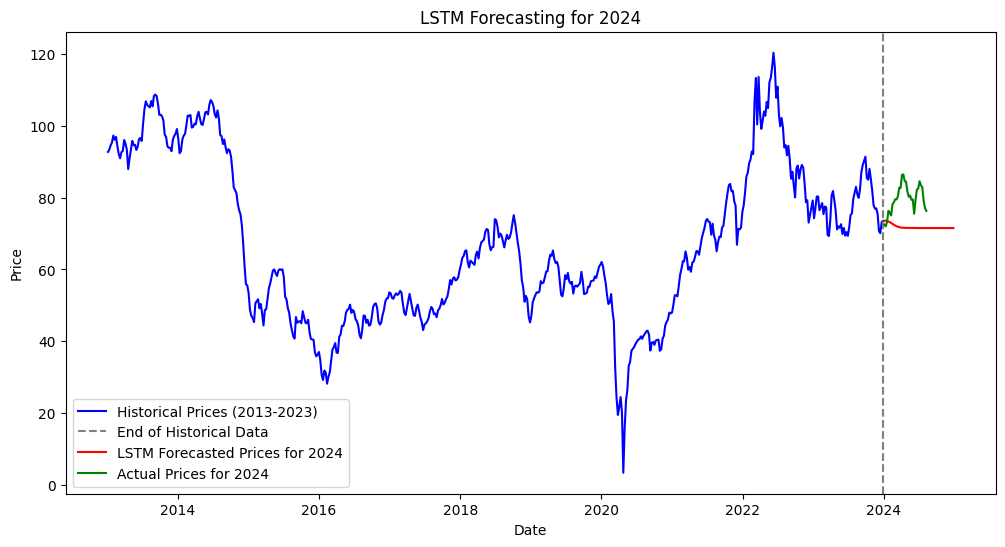

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Loading and preparing data
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]
prices = df_filtered['Price'].dropna().values

# Normalizing prices using RobustScaler to handle outliers
scaler = RobustScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Preparing TimeseriesGenerator for LSTM
sequence_length = 10
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=1)

# Defining the LSTM model with Dropout layer and Adam optimizer
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dropout(dropout_rate))  # Adding Dropout to prevent overfitting
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Training the LSTM model
lstm_model = create_lstm_model(units=100, dropout_rate=0.3)
lstm_model.fit(generator, epochs=100, verbose=0)

# Forecasting using the trained LSTM model
lstm_predictions = []

# Taking the last sequence from 2023 for making predictions
last_sequence = prices_scaled[-sequence_length:]

for _ in range(52):  # Forecasting the next 52 weekly steps for 2024
    # LSTM prediction
    lstm_pred = lstm_model.predict(last_sequence.reshape((1, sequence_length, 1)))
    lstm_predictions.append(lstm_pred[0, 0])

    # Updating the sequence for the next prediction
    last_sequence = np.append(last_sequence[1:], [[lstm_pred[0, 0]]], axis=0)

# Inverse transforming the predictions to the original scale
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))

# Generating future dates for the year 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Creating a DataFrame for the forecasted prices
forecasted_df = pd.DataFrame(data=lstm_predictions.flatten(), index=future_dates, columns=['Forecasted Price'])

# Assuming actual prices for 2024 are available in the dataset
actual_prices_df = df['2024-01-05':'2024-09-08']  # Adjust range to match available data

# Printing forecasted and actual values
for date, forecasted_price, actual_price in zip(future_dates, forecasted_df['Forecasted Price'], actual_prices_df['Price']):
    print(f"Forecasted Price for {date.date()}: {forecasted_price:.2f}, Actual Price: {actual_price:.2f}")

# Calculating error metrics
mae = mean_absolute_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
mape = mean_absolute_percentage_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
rmse = np.sqrt(mean_squared_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)]))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Price'], label='LSTM Forecasted Prices for 2024', color='red')
plt.plot(actual_prices_df.index, actual_prices_df['Price'], label='Actual Prices for 2024', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Forecasting for 2024')
plt.show()


In [ ]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 19.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Loading and preprocessing the data
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Filtering the data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]
prices = df_filtered['Price'].dropna().values

# Normalizing the prices
scaler = RobustScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))


In [ ]:
# Defining a sequence length for time series input
sequence_length = 10

# Splitting data into train and test for aARIMA-GRU and mARIMA-GRU
train_data = prices_scaled[:-sequence_length]
test_data = prices_scaled[-sequence_length:]

# Creating and fitting ARIMA model for linear trends
arima_model = ARIMA(train_data, order=(5, 1, 0))  # Adjust ARIMA order as necessary
arima_fitted = arima_model.fit()

# Forecasting with the ARIMA model
arima_forecast = arima_fitted.predict(start=0, end=len(train_data) + len(test_data) - 1)


In [ ]:
# Define a sequence length for time series input
sequence_length = 10

# Split data into train and test for ARIMA-GRU and mARIMA-GRU
train_data = prices_scaled[:-sequence_length]
test_data = prices_scaled[-sequence_length:]

# Create ARIMA model for linear trends
arima_model = ARIMA(train_data, order=(5, 1, 0))  # Adjust ARIMA order as necessary
arima_fitted = arima_model.fit()
arima_forecast = arima_fitted.predict(start=0, end=len(train_data) + len(test_data) - 1)

# Function to create sequences for GRU input
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
    return np.array(sequences)

# Prepare data for aARIMA-GRU (Additive model)
train_residuals = train_data.flatten() - arima_forecast[:len(train_data)]
train_residuals_reshaped = create_sequences(train_residuals, sequence_length)
train_residuals_reshaped = train_residuals_reshaped.reshape((train_residuals_reshaped.shape[0], sequence_length, 1))

# Define and train a GRU model for aARIMA-GRU
def create_gru_model():
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(train_residuals_reshaped, train_residuals[sequence_length:], epochs=50, verbose=0)

# Prepare data for mARIMA-GRU (Multiplicative model)
train_ratio = train_data.flatten() / (arima_forecast[:len(train_data)] + 1e-5)
train_ratio_reshaped = create_sequences(train_ratio, sequence_length)
train_ratio_reshaped = train_ratio_reshaped.reshape((train_ratio_reshaped.shape[0], sequence_length, 1))

# Define and train another GRU model for mARIMA-GRU
gru_model_multiplicative = create_gru_model()
gru_model_multiplicative.fit(train_ratio_reshaped, train_ratio[sequence_length:], epochs=50, verbose=0)

# Forecast with aARIMA-GRU and mARIMA-GRU for 52 steps (1 year for 2024)
aARIMA_GRU_predictions = []
mARIMA_GRU_predictions = []
last_sequence = test_data  # Initialize with the last sequence from 2023


In [ ]:
for _ in range(52):  # Forecasting 52 weekly steps for 2024
    # aARIMA-GRU predicting
    arima_pred = arima_fitted.forecast(steps=1)
    gru_pred = gru_model.predict(last_sequence.reshape((1, sequence_length, 1))).flatten()
    aARIMA_GRU_forecast = arima_pred + gru_pred
    aARIMA_GRU_predictions.append(aARIMA_GRU_forecast[0])

    # mARIMA-GRU predicting
    arima_pred_multiplicative = arima_fitted.forecast(steps=1)
    gru_pred_multiplicative = gru_model_multiplicative.predict(last_sequence.reshape((1, sequence_length, 1))).flatten()
    mARIMA_GRU_forecast = arima_pred_multiplicative * gru_pred_multiplicative
    mARIMA_GRU_predictions.append(mARIMA_GRU_forecast[0])

    # Updating the sequence
    last_sequence = np.append(last_sequence[1:], [[aARIMA_GRU_forecast[0]]], axis=0)

# Inverse transforming predictions
aARIMA_GRU_predictions = scaler.inverse_transform(np.array(aARIMA_GRU_predictions).reshape(-1, 1))
mARIMA_GRU_predictions = scaler.inverse_transform(np.array(mARIMA_GRU_predictions).reshape(-1, 1))

# Combining the predictions as features for the ANN model (Ensemble)
ensemble_features = np.column_stack((aARIMA_GRU_predictions, mARIMA_GRU_predictions))

# Building ANN model to combine predictions (stacked model)
ann_model = Sequential()
ann_model.add(Dense(50, activation='relu', input_dim=2))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', loss='mse')

# Training ANN model
ann_model.fit(ensemble_features, aARIMA_GRU_predictions, epochs=100, verbose=0)


1/1 [==============================] - 0s 25ms/step


2/2 [==============================] - 0s 3ms/step
Forecasted Price for 2024-01-05: 84.01, Actual Price: 72.49
Forecasted Price for 2024-01-12: 80.78, Actual Price: 72.03
Forecasted Price for 2024-01-19: 76.36, Actual Price: 73.36
Forecasted Price for 2024-01-26: 73.40, Actual Price: 76.36
Forecasted Price for 2024-02-02: 72.43, Actual Price: 75.78
Forecasted Price for 2024-02-09: 73.12, Actual Price: 75.05
Forecasted Price for 2024-02-16: 74.76, Actual Price: 78.17
Forecasted Price for 2024-02-23: 76.84, Actual Price: 78.71
Forecasted Price for 2024-03-01: 78.11, Actual Price: 79.58
Forecasted Price for 2024-03-08: 78.35, Actual Price: 79.53
Forecasted Price for 2024-03-15: 78.29, Actual Price: 80.43
Forecasted Price for 2024-03-22: 78.01, Actual Price: 82.79
Forecasted Price for 2024-03-29: 77.74, Actual Price: 82.73
Forecasted Price for 2024-04-05: 77.53, Actual Price: 86.35
Forecasted Price for 2024-04-12: 77.43, Actual Price: 86.50
Forecasted Price for 2024-04-19: 77.41, Actual Pr

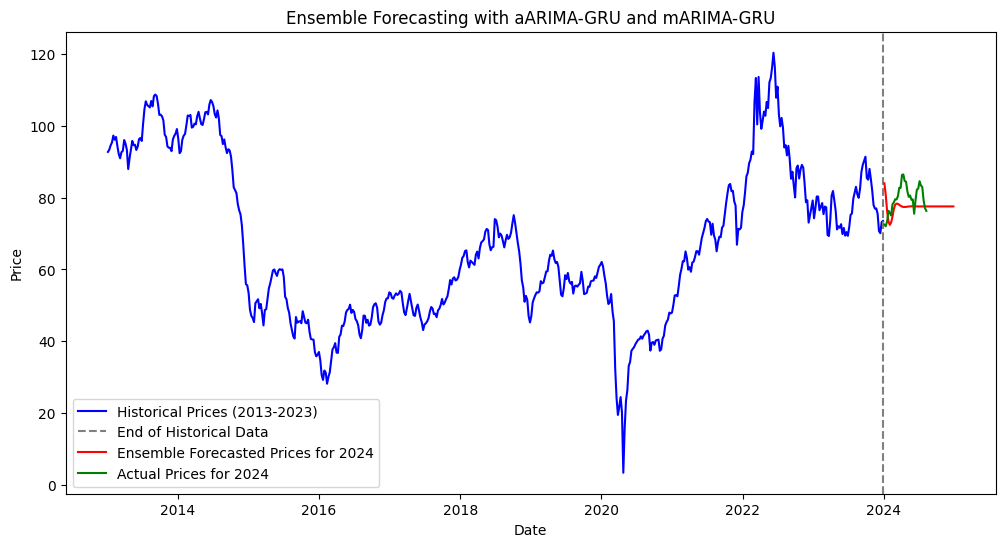

In [ ]:
# Final predicting using ANN
final_predictions = ann_model.predict(ensemble_features)

# Generating future dates for the entire year of 2024
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')

# Creating a DataFrame for the forecasted prices
forecasted_df = pd.DataFrame(data=final_predictions.flatten(), index=future_dates, columns=['Forecasted Price'])

# Retrieving actual prices for 2024 from the dataset
actual_prices_df = df['2024-01-05':'2024-09-08']  # Adjusting range to match available data

# Printing forecasted and actual values
for date, forecasted_price, actual_price in zip(future_dates, forecasted_df['Forecasted Price'], actual_prices_df['Price']):
    print(f"Forecasted Price for {date.date()}: {forecasted_price:.2f}, Actual Price: {actual_price:.2f}")

# Calculating error metrics
mae = mean_absolute_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
mape = mean_absolute_percentage_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
rmse = np.sqrt(mean_squared_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)]))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Price'], label='Ensemble Forecasted Prices for 2024', color='red')
plt.plot(actual_prices_df.index, actual_prices_df['Price'], label='Actual Prices for 2024', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ensemble Forecasting with aARIMA-GRU and mARIMA-GRU')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Forecasted Price for 2024-01-05: 72.09, Actual Price: 72.49
Forecasted Price for 2024-01-12: 73.59, Actual Price: 72.03
Forecasted Price for 2024-01-19: 74.86, Actual Price: 73.36
Forecasted Price for 2024-01-26: 75.53, Actual Price: 76.36
Forecasted Price for 2024-02-02: 74.97, Actual Price: 75.78
Forecasted Price for 2024-02-09: 74.51, Actual Price: 75.05
Forecasted Price for 2024-02-16: 75.19, Actual Price: 78.17
Forecasted Price for 2024-02-23: 75.77, Actual Price: 78.71
Forecasted Price for 2024-03-01: 75.22, Actual Price: 79.58
Forecasted Price for 2024-03-08: 74.68, Actual Price: 79.53
Forecasted Price for 2024-03-15: 74.42, Actual Price: 80.43
Forecasted Price for 2024-03-22: 74.38, Actual Price: 82.79
Forecasted Price for 2024-03-29: 74.99, Actual Price: 82.73
Forecasted Price for 2024-04-05: 75.51, Actual Price: 86.35
Forecasted Price for 2024-04-12: 74.77, Actual Price: 86.50
Forecasted Price for 2024-04-19: 73.93, Actual Price: 84.65
Fo

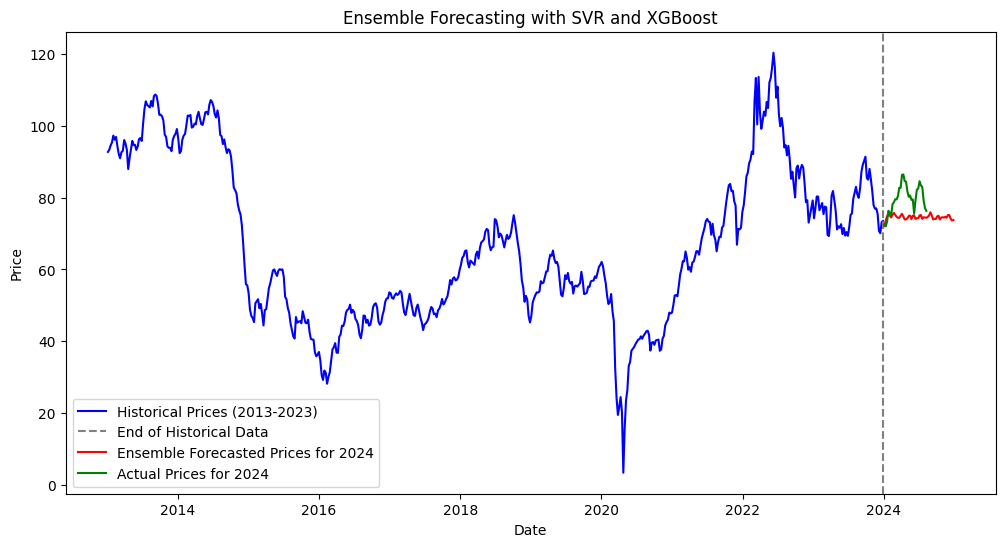

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Loading and preprocessing data
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Step 2: Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]
prices = df_filtered['Price'].dropna().values

# Step 3: Normalizing the prices using RobustScaler
scaler = RobustScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Step 4: Defining sequence length and creating train-test split
sequence_length = 10
train_data = prices_scaled[:-sequence_length]
test_data = prices_scaled[-sequence_length:]

# Function to create sequences for time series input
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

# Creating sequences for training SVR and XGBoost models
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, _ = create_sequences(test_data, sequence_length)

# Step 5: Defining and training the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 6: Defining and training the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 7: Forecasting for 52 weeks into 2024
svr_predictions = []
xgb_predictions = []
last_sequence = test_data  # Starting with the last sequence of 2023

for _ in range(52):  # Forecasting 52 weekly steps for 2024
    # SVR predicting
    svr_pred = svr_model.predict(last_sequence.reshape(1, -1)).flatten()
    svr_predictions.append(svr_pred[0])

    # XGBoost predicting
    xgb_pred = xgb_model.predict(last_sequence.reshape(1, -1)).flatten()
    xgb_predictions.append(xgb_pred[0])

    # Updating the sequence
    next_val = (svr_pred[0] + xgb_pred[0]) / 2  # Using mean to update for the next iteration
    last_sequence = np.append(last_sequence[1:], [[next_val]], axis=0)

# Inverse transforming predictions
svr_predictions = scaler.inverse_transform(np.array(svr_predictions).reshape(-1, 1))
xgb_predictions = scaler.inverse_transform(np.array(xgb_predictions).reshape(-1, 1))

# Step 8: Preparing ensemble features and training the ANN
ensemble_features = np.column_stack((svr_predictions, xgb_predictions))

# Building the ANN model
ann_model = Sequential()
ann_model.add(Dense(50, activation='relu', input_dim=2))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', loss='mse')

# Training ANN on ensemble features (stacked model)
ann_model.fit(ensemble_features, svr_predictions, epochs=100, verbose=0)

# Step 9: Final predicting using ANN
final_predictions = ann_model.predict(ensemble_features)

# Step 10: Generating future dates and plotting results
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')
forecasted_df = pd.DataFrame(data=final_predictions.flatten(), index=future_dates, columns=['Forecasted Price'])

# Retrieving actual prices for 2024 from the dataset
actual_prices_df = df['2024-01-05':'2024-09-08']  # Adjusting range to match available data

# Printing forecasted and actual values
for date, forecasted_price, actual_price in zip(future_dates, forecasted_df['Forecasted Price'], actual_prices_df['Price']):
    print(f"Forecasted Price for {date.date()}: {forecasted_price:.2f}, Actual Price: {actual_price:.2f}")

# Calculating error metrics
mae = mean_absolute_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
mape = mean_absolute_percentage_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
rmse = np.sqrt(mean_squared_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)]))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Price'], label='Ensemble Forecasted Prices for 2024', color='red')
plt.plot(actual_prices_df.index, actual_prices_df['Price'], label='Actual Prices for 2024', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ensemble Forecasting with SVR and XGBoost')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Forecasted Price for 2024-01-05: 72.57, Actual Price: 72.49
Forecasted Price for 2024-01-12: 74.38, Actual Price: 72.03
Forecasted Price for 2024-01-19: 75.73, Actual Price: 73.36
Forecasted Price for 2024-01-26: 75.73, Actual Price: 76.36
Forecasted Price for 2024-02-02: 74.39, Actual Price: 75.78
Forecasted Price for 2024-02-09: 74.31, Actual Price: 75.05
Forecasted Price for 2024-02-16: 75.85, Actual Price: 78.17
Forecasted Price for 2024-02-23: 76.26, Actual Price: 78.71
Forecasted Price for 2024-03-01: 74.79, Actual Price: 79.58
Forecasted Price for 2024-03-08: 74.67, Actual Price: 79.53
Forecasted Price for 2024-03-15: 74.61, Actual Price: 80.43
Forecasted Price for 2024-03-22: 74.67, Actual Price: 82.79
Forecasted Price for 2024-03-29: 75.56, Actual Price: 82.73
Forecasted Price for 2024-04-05: 75.86, Actual Price: 86.35
Forecasted Price for 2024-04-12: 74.34, Actual Price: 86.50
Forecasted Price for 2024-04-19: 73.76, Actual Price: 84.65
Fo

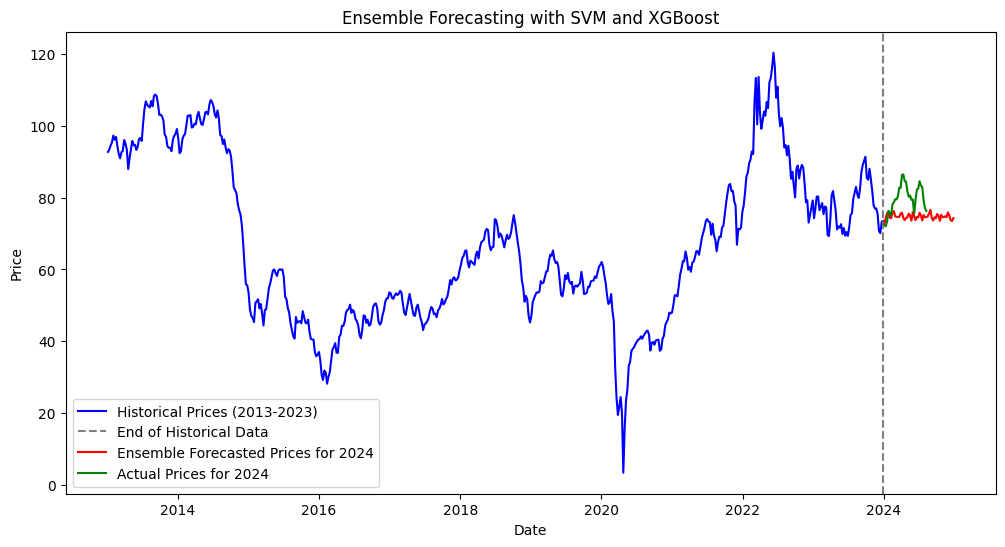

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Loading and preprocessing data
df = pd.read_csv('dataset weekly.csv', parse_dates=['Week of'], index_col='Week of')
df = df.sort_index()

# Step 2: Filtering data between 2013 and 2023
start_date = '2013-01-04'
end_date = '2023-12-29'
df_filtered = df[start_date:end_date]
prices = df_filtered['Price'].dropna().values

# Step 3: Normalizing the prices using RobustScaler
scaler = RobustScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Step 4: Defining sequence length and creating train-test split
sequence_length = 10
train_data = prices_scaled[:-sequence_length]
test_data = prices_scaled[-sequence_length:]

# Function for creating sequences for time series input
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

# Creating sequences for training SVM and XGBoost models
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, _ = create_sequences(test_data, sequence_length)

# Step 5: Defining and training the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 6: Defining and training the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 7: Forecasting for 52 weeks into 2024
svm_predictions = []
xgb_predictions = []
last_sequence = test_data  # Starting with the last sequence of 2023

for _ in range(52):  # Forecasting 52 weekly steps for 2024
    # SVM predicting
    svm_pred = svm_model.predict(last_sequence.reshape(1, -1)).flatten()
    svm_predictions.append(svm_pred[0])

    # XGBoost predicting
    xgb_pred = xgb_model.predict(last_sequence.reshape(1, -1)).flatten()
    xgb_predictions.append(xgb_pred[0])

    # Updating the sequence for next iteration (using the mean of predictions as next input)
    next_val = (svm_pred[0] + xgb_pred[0]) / 2
    last_sequence = np.append(last_sequence[1:], [[next_val]], axis=0)

# Inverse transforming predictions
svm_predictions = scaler.inverse_transform(np.array(svm_predictions).reshape(-1, 1))
xgb_predictions = scaler.inverse_transform(np.array(xgb_predictions).reshape(-1, 1))

# Step 8: Preparing ensemble features and training the ANN
ensemble_features = np.column_stack((svm_predictions, xgb_predictions))

# Building the ANN model
ann_model = Sequential()
ann_model.add(Dense(50, activation='relu', input_dim=2))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', loss='mse')

# Training ANN on ensemble features (stacked model)
ann_model.fit(ensemble_features, svm_predictions, epochs=100, verbose=0)

# Step 9: Final predicting using ANN
final_predictions = ann_model.predict(ensemble_features)

# Step 10: Generating future dates and plotting results
future_dates = pd.date_range(start='2024-01-05', periods=52, freq='W-FRI')
forecasted_df = pd.DataFrame(data=final_predictions.flatten(), index=future_dates, columns=['Forecasted Price'])

# Retrieving actual prices for 2024 from the dataset
actual_prices_df = df['2024-01-05':'2024-09-08']  # Adjusting range to match available data

# Printing forecasted and actual values
for date, forecasted_price, actual_price in zip(future_dates, forecasted_df['Forecasted Price'], actual_prices_df['Price']):
    print(f"Forecasted Price for {date.date()}: {forecasted_price:.2f}, Actual Price: {actual_price:.2f}")

# Calculating error metrics
mae = mean_absolute_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
mape = mean_absolute_percentage_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)])
rmse = np.sqrt(mean_squared_error(actual_prices_df['Price'], forecasted_df['Forecasted Price'][:len(actual_prices_df)]))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, prices, label='Historical Prices (2013-2023)', color='blue')
plt.axvline(x=pd.Timestamp('2023-12-29'), color='gray', linestyle='--', label='End of Historical Data')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Price'], label='Ensemble Forecasted Prices for 2024', color='red')
plt.plot(actual_prices_df.index, actual_prices_df['Price'], label='Actual Prices for 2024', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ensemble Forecasting with SVM and XGBoost')
plt.show()
